<a href="https://colab.research.google.com/github/Sudhangsahu2234/Email-Fraud-Detection/blob/main/SpamEmail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

file_path = '/content/emails.csv'
emails_df = pd.read_csv(file_path)


X = emails_df['text']
y = emails_df['spam']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
emails_df.head()

NameError: name 'emails_df' is not defined

In [ ]:
emails_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [ ]:
emails_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes Classifier Report:\n")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classifier Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       872
           1       0.97      0.96      0.96       274

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146



In [ ]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       872
           1       0.98      0.94      0.96       274

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

y_pred_svm = svm_model.predict(X_test_tfidf)
print("Support Vector Machine Report:\n")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       872
           1       0.97      0.98      0.98       274

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [ ]:
from sklearn.metrics import accuracy_score

# Compare accuracy
print("Accuracy Scores:")
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):.10f}")
print(f"Logistic Regression: {accuracy_score(y_test, y_pred_lr):.10f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):.10f}")


Accuracy Scores:
Naive Bayes: 0.9825479930
Logistic Regression: 0.9816753927
SVM: 0.9886561955


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


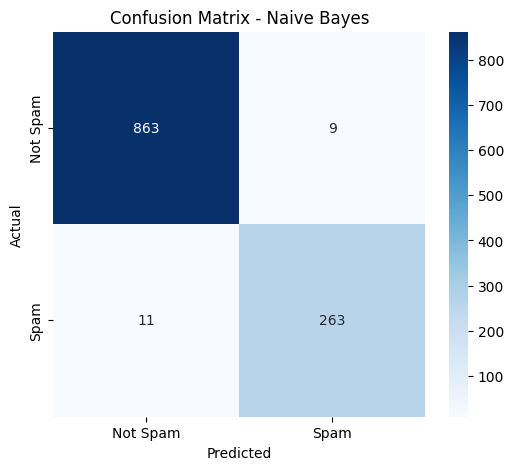

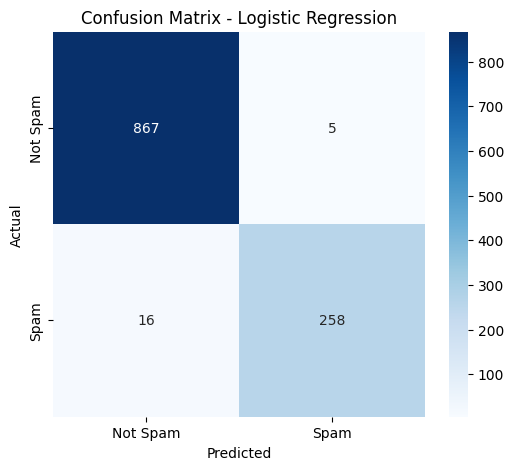

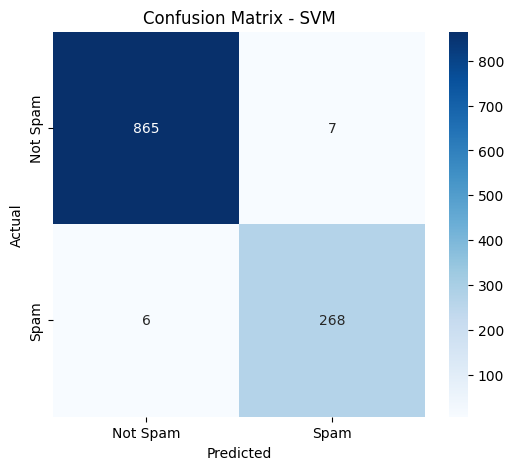

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")


<ipython-input-11-bd3ead36c9e8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


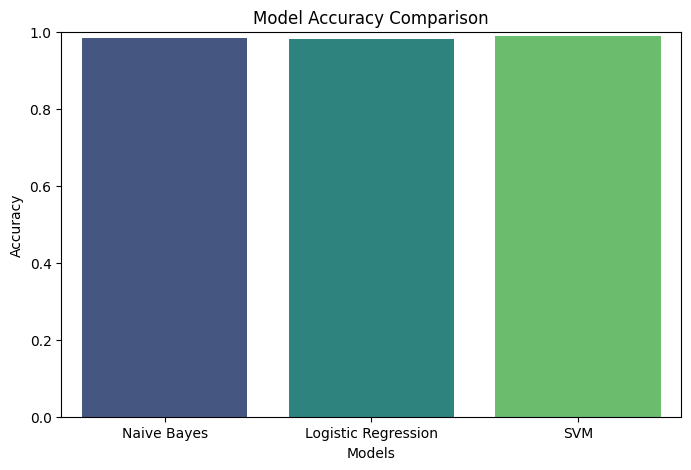

In [ ]:
# Collect accuracy scores
model_names = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm)
]

# Create a bar plot for accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [ ]:
def predict_sample_email(sample_text):

    sample_tfidf = tfidf_vectorizer.transform([sample_text])


    nb_pred = nb_model.predict(sample_tfidf)[0]
    lr_pred = lr_model.predict(sample_tfidf)[0]
    svm_pred = svm_model.predict(sample_tfidf)[0]

    print("\nSample Email Prediction Results:")
    print(f"Naive Bayes Prediction: {'Spam' if nb_pred == 1 else 'Not Spam'}")
    print(f"Logistic Regression Prediction: {'Spam' if lr_pred == 1 else 'Not Spam'}")
    print(f"SVM Prediction: {'Spam' if svm_pred == 1 else 'Not Spam'}")

sample_email = "Congratulations! You've won a free vacation. Click the link to claim your prize."
predict_sample_email(sample_email)



Sample Email Prediction Results:
Naive Bayes Prediction: Spam
Logistic Regression Prediction: Spam
SVM Prediction: Spam
